Digite a idade (0 a 90): 26

Idade = 26
Jovem  = 0.36
Adulto = 0.02
Idoso  = 0.00
Grupo mais representativo: Jovem


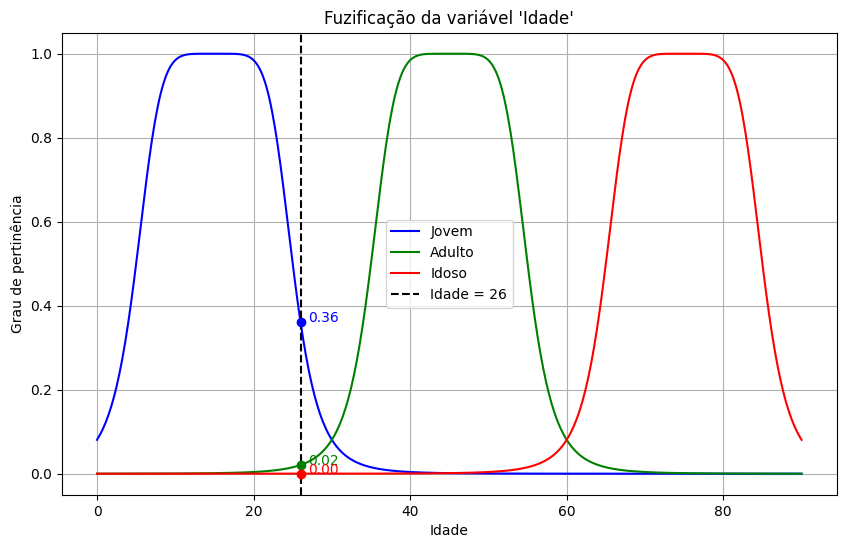

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- Função sino generalizada (gbellmf) ----------
def gbellmf(x, a, b, c):
    """
    Função de pertinência do tipo sino generalizado.
    a = largura
    b = inclinação
    c = centro
    """
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# ---------- Universo de discurso ----------
x = np.linspace(0, 90, 500)

# ---------- Conjuntos fuzzy ----------
jovem = gbellmf(x, 10, 3, 15)    # centrado em 15
adulto = gbellmf(x, 10, 3, 45)   # centrado em 45
idoso  = gbellmf(x, 10, 3, 75)   # centrado em 75

# ---------- Entrada do usuário ----------
idade = int(input("Digite a idade (0 a 90): "))

# ---------- Cálculo das pertinências ----------
pert_jovem = np.interp(idade, x, jovem)
pert_adulto = np.interp(idade, x, adulto)
pert_idoso  = np.interp(idade, x, idoso)

# ---------- Mostrar pertinências ----------
print("\nIdade =", idade)
print(f"Jovem  = {pert_jovem:.2f}")
print(f"Adulto = {pert_adulto:.2f}")
print(f"Idoso  = {pert_idoso:.2f}")

# Maior pertinência
grupos = {"Jovem": pert_jovem, "Adulto": pert_adulto, "Idoso": pert_idoso}
grupo_final = max(grupos, key=grupos.get)
print("Grupo mais representativo:", grupo_final)

# ---------- Gráfico ----------
plt.figure(figsize=(10,6))
plt.plot(x, jovem, 'b', label='Jovem')
plt.plot(x, adulto, 'g', label='Adulto')
plt.plot(x, idoso, 'r', label='Idoso')

# Entrada
plt.axvline(x=idade, color='k', linestyle='--', label=f'Idade = {idade}')
plt.plot(idade, pert_jovem, 'bo')
plt.plot(idade, pert_adulto, 'go')
plt.plot(idade, pert_idoso, 'ro')

# Valores no gráfico
plt.text(idade+1, pert_jovem, f"{pert_jovem:.2f}", color='b')
plt.text(idade+1, pert_adulto, f"{pert_adulto:.2f}", color='g')
plt.text(idade+1, pert_idoso, f"{pert_idoso:.2f}", color='r')

plt.title("Fuzificação da variável 'Idade'")
plt.xlabel("Idade")
plt.ylabel("Grau de pertinência")
plt.legend()
plt.grid(True)
plt.ylim(-0.05, 1.05)
plt.show()